<a href="https://colab.research.google.com/github/buxkirill/reboot_DA/blob/main/SQL/homeworks/lesson_4_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#проверка подключения PostgreSQL 
import psycopg2
import pandas as pd
#Библиотека ждя визуализации
from IPython.display import HTML
import plotly.express as px
import matplotlib.pyplot as plt

#!введите свои реквизиты!
DB_HOST = '52.157.159.24'
DB_USER = 'student10'
DB_USER_PASSWORD = 'student10_password'
DB_NAME = 'sql_ex_for_student10'

conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)

### --task6 (lesson4) - занятие
-- Компьютерная фирма: Построить по all_products график в colab/jupyter (X: maker, Y: средняя цена)

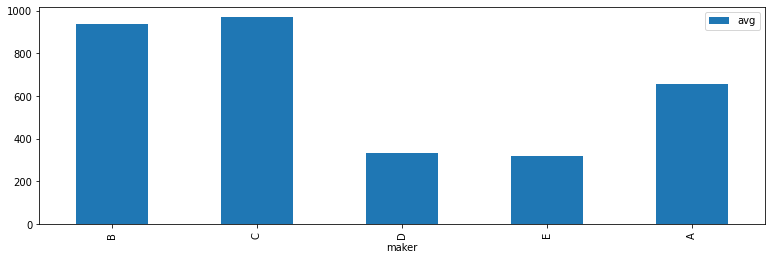

In [7]:
request = """
SELECT * FROM all_products_second_stream
"""
df = pd.read_sql_query(request, conn)
df.plot(kind='bar', x='maker', y='avg', figsize=(13,4))
plt.show()

### --task10 (lesson4) - занятие
-- Компьютерная фирма: На базе products_price_categories_with_makers по строить по каждому производителю график (X: category_price, Y: count)

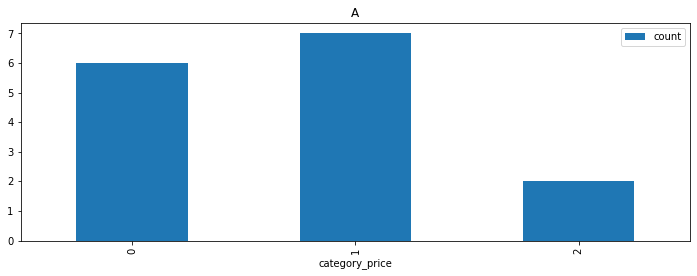

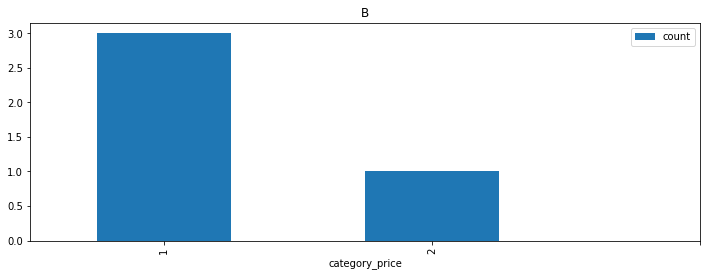

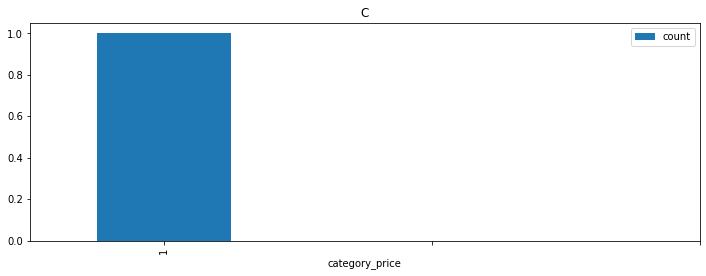

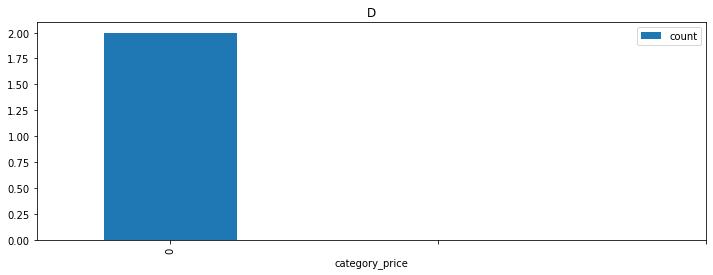

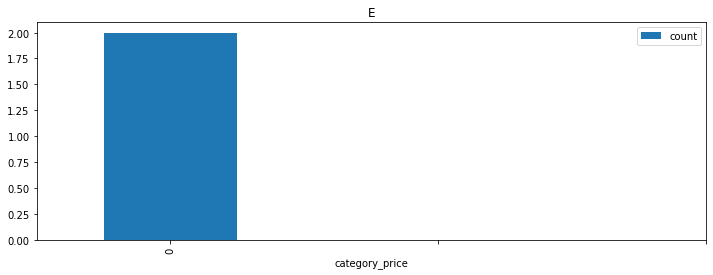

In [27]:
request = """
SELECT * FROM products_price_categories_with_makers_second_stream;
"""
df = pd.read_sql_query(request, conn)

for maker in df.maker.unique():
    df_temp = df[df.maker == maker]
    ax = df_temp.plot(kind='bar', x='category_price', y='count', figsize=(12, 4), title=maker)
    ax.set_xticks([0,1,2])
    plt.show()
    del df_temp 

### --task11 (lesson4) - занятие
-- Компьютерная фирма: На базе products_price_categories_with_makers по строить по A & D график (X: category_price, Y: count)

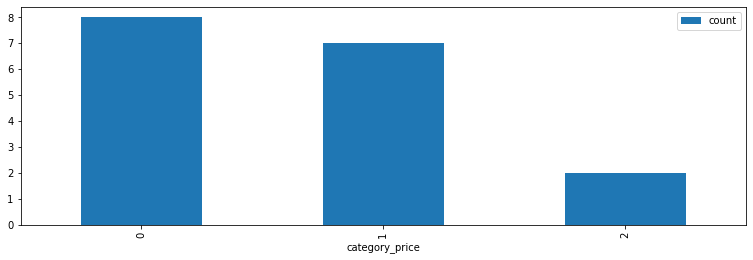

In [25]:
df[(df.maker == 'A') | (df.maker == 'D')].groupby(by='category_price').sum().plot(kind='bar',figsize=(13,4))
plt.show()

### --task7 (lesson4) - ДЗ
-- По предыдущему view (count_products_by_makers) сделать график в colab (X: maker, y: count)

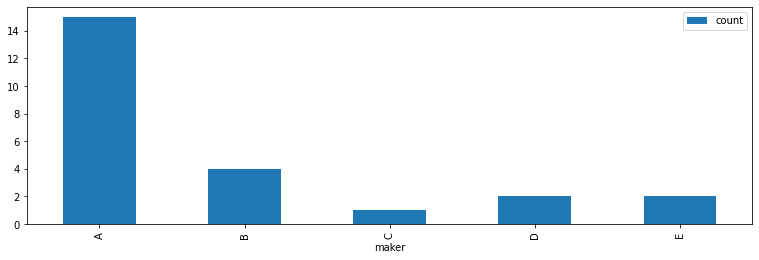

In [6]:
request = """
SELECT * FROM count_products_by_makers_second_stream;
"""
df = pd.read_sql_query(request, conn)

df.plot(kind='bar', x='maker', y='count', figsize=(13,4))
plt.show()

### --task11 (lesson4)  - ДЗ
-- Корабли: По предыдущему view (sunk_ships_by_classes) сделать график в colab (X: class, Y: count)


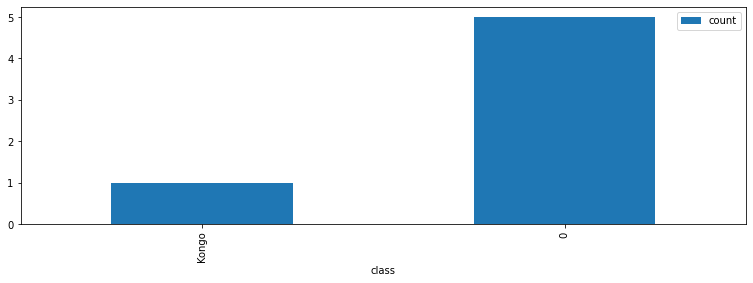

In [2]:
request = """
SELECT * FROM sunk_ships_by_classes_second_stream;
"""
df = pd.read_sql_query(request, conn)
df.plot(kind='bar', x='class', y='count', figsize=(13,4))
plt.show()

### --task13 (lesson4)  - ДЗ
-- Корабли: Сделать график в colab по таблице classes с количеством классов по странам (X: country, Y: count)


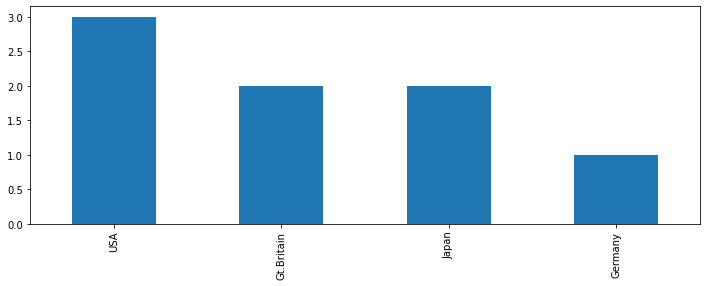

In [8]:
request = """
SELECT * FROM classes;
"""
df = pd.read_sql_query(request, conn)
df.country.value_counts().plot(kind='bar', figsize=(12,4))
plt.show()

### --task16 (lesson4) -  - ДЗ
-- Корабли: Построить график с количеством запущенных на воду кораблей и годом запуска (X: year, Y: count)

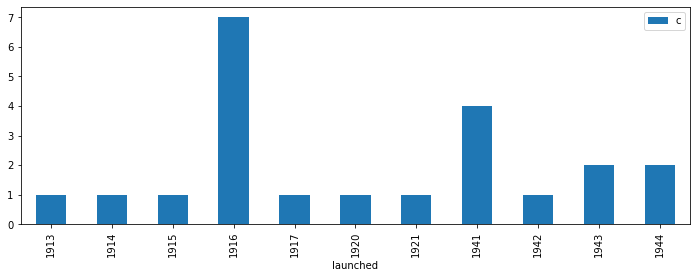

In [10]:
request = """
SELECT * FROM ships;
"""
df = pd.read_sql_query(request, conn)

df.groupby(by='launched').count().plot(kind='bar', y='class', figsize=(12,4))
plt.legend('count')
plt.show()